# Discription of Data

I downloaded the data of Tata power of past 10 years data from yahoo finance. In this data we have 7 columsn which are

1-Date--> Day wise date    
2-Open---> price when market opens    
3-High---> High of the day    
4-Low----> Low of the day     
5-Close--->Closing price of share when market close    
6-AdjClose-->Adjusted close price   
7-Volume----> Total no. of shares in a day traded    
 
This is day wise data which has 1 day frequecy. I want to predict the closing price of share. So in future I will train my models by only Close price.

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sn

In [173]:
data=pd.read_csv('TATAPOWER.NS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-06-10,118.513756,120.125336,118.040901,119.758629,94.478264,1822817.0
1,2011-06-13,118.793610,120.144638,117.153084,119.396751,94.192795,2887036.0
2,2011-06-14,118.837036,122.074669,118.837036,120.617493,95.155830,2931419.0
3,2011-06-15,119.869606,120.906998,118.923889,119.445000,94.230865,1566676.0
4,2011-06-16,119.372620,120.120514,118.118103,118.571655,93.541855,2295793.0


In [174]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2711,2022-06-03,236.300003,236.850006,230.199997,231.050003,231.050003,11433422.0
2712,2022-06-06,231.000000,233.600006,227.550003,232.250000,232.250000,11689465.0
2713,2022-06-07,230.899994,235.500000,229.750000,234.750000,234.750000,14994271.0
2714,2022-06-08,235.949997,236.399994,231.100006,233.000000,233.000000,13235033.0
2715,2022-06-09,232.000000,234.699997,231.399994,233.050003,233.050003,10241164.0


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2716 non-null   object 
 1   Open       2710 non-null   float64
 2   High       2710 non-null   float64
 3   Low        2710 non-null   float64
 4   Close      2710 non-null   float64
 5   Adj Close  2710 non-null   float64
 6   Volume     2710 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.7+ KB


# Data Cleaning and Feature Engineering

In [176]:
data['Date']=data['Date'].astype('datetime64')   #changed data type of date from object to date type

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2716 non-null   datetime64[ns]
 1   Open       2710 non-null   float64       
 2   High       2710 non-null   float64       
 3   Low        2710 non-null   float64       
 4   Close      2710 non-null   float64       
 5   Adj Close  2710 non-null   float64       
 6   Volume     2710 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 148.7 KB


In [178]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-06-10,118.513756,120.125336,118.040901,119.758629,94.478264,1822817.0
1,2011-06-13,118.793610,120.144638,117.153084,119.396751,94.192795,2887036.0
2,2011-06-14,118.837036,122.074669,118.837036,120.617493,95.155830,2931419.0
3,2011-06-15,119.869606,120.906998,118.923889,119.445000,94.230865,1566676.0
4,2011-06-16,119.372620,120.120514,118.118103,118.571655,93.541855,2295793.0
...,...,...,...,...,...,...,...
2711,2022-06-03,236.300003,236.850006,230.199997,231.050003,231.050003,11433422.0
2712,2022-06-06,231.000000,233.600006,227.550003,232.250000,232.250000,11689465.0
2713,2022-06-07,230.899994,235.500000,229.750000,234.750000,234.750000,14994271.0
2714,2022-06-08,235.949997,236.399994,231.100006,233.000000,233.000000,13235033.0


In [179]:
data['Date']=data['Date'].astype('datetime64[D]')   #changed to day type

In [180]:
data.set_index('Date',inplace=True)    #set date as a index

In [181]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-06-10,118.513756,120.125336,118.040901,119.758629,94.478264,1822817.0
2011-06-13,118.793610,120.144638,117.153084,119.396751,94.192795,2887036.0
2011-06-14,118.837036,122.074669,118.837036,120.617493,95.155830,2931419.0
2011-06-15,119.869606,120.906998,118.923889,119.445000,94.230865,1566676.0
2011-06-16,119.372620,120.120514,118.118103,118.571655,93.541855,2295793.0
...,...,...,...,...,...,...
2022-06-03,236.300003,236.850006,230.199997,231.050003,231.050003,11433422.0
2022-06-06,231.000000,233.600006,227.550003,232.250000,232.250000,11689465.0
2022-06-07,230.899994,235.500000,229.750000,234.750000,234.750000,14994271.0


In [182]:
data=data.drop('Volume',axis=1)   #dropped the volume

Distribution Plots to see stationary

In [183]:
def dist_plotter(df):
    for i in df.columns:
        ax=plt.subplots(1,1,figsize=(10,6))
        ax=plt.plot(df[i])
        ax=plt.title(f'Distribution of {i}')
        ax=plt.xlabel('time')
        ax=plt.ylabel(i)
        plt.show()

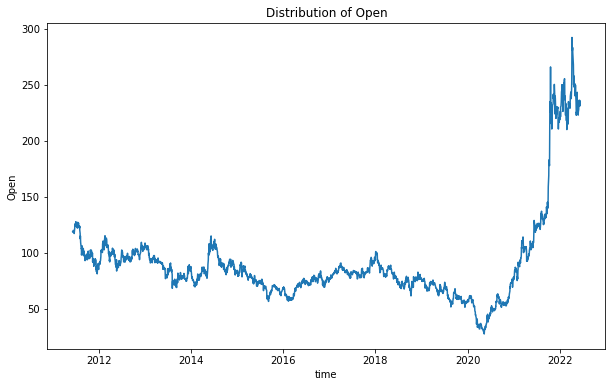

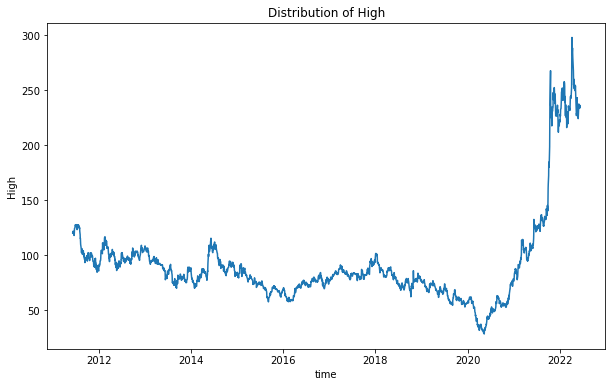

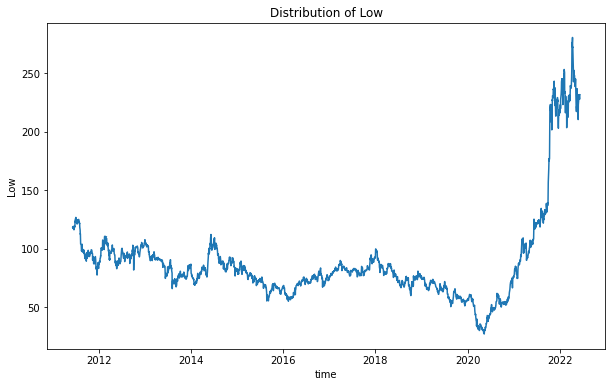

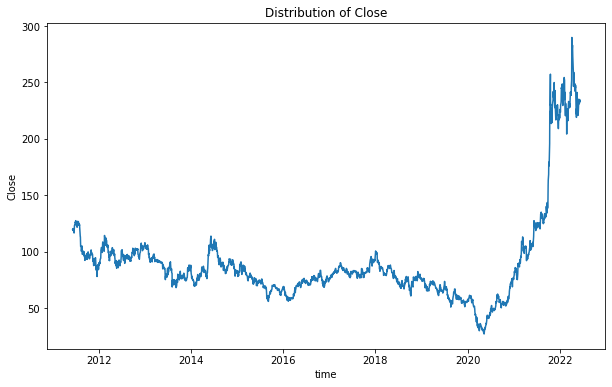

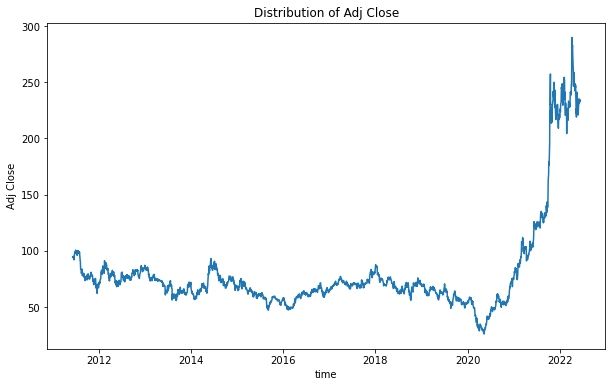

In [184]:
dist_plotter(data)

By the visualisation We can see that no one is stationary series. So we have to make stationary .

In [185]:
def diff_plotter(df):
    for i in df.columns:
        new_col1=df[i].diff(1)
        new_col2=df[i].diff(2)
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
        ax1=plt.plot(new_col1)
        ax1=plt.title(f'Distribution Of {i} when differencing is 1')
        ax1=plt.xlabel('time')
        ax1=plt.show()
        
        ax2=plt.plot(new_col2)
        ax2=plt.title(f'Distribution Of {i} when differencing is 2')
        ax2=plt.xlabel('time')
        ax2=plt.ylabel(i)
        ax2=plt.show()

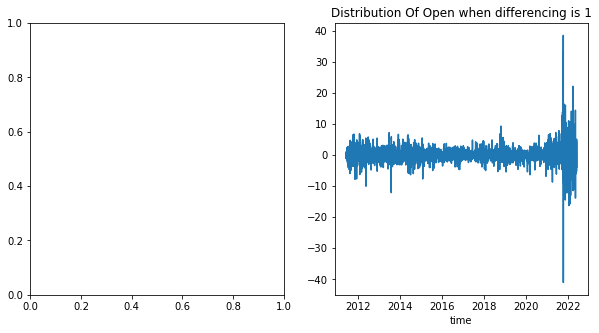

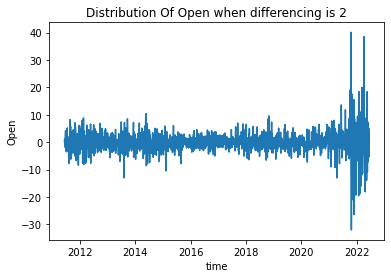

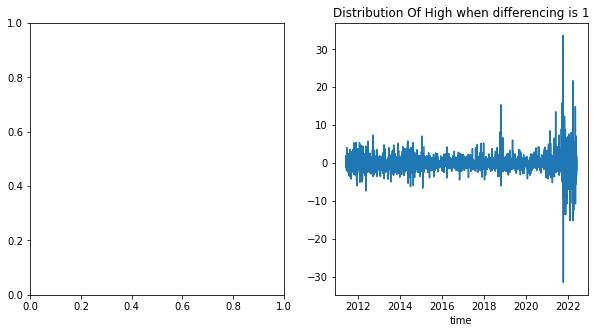

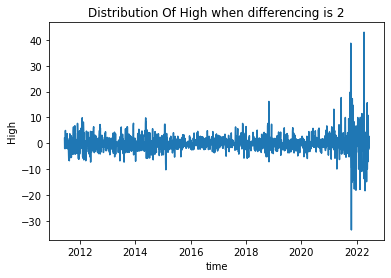

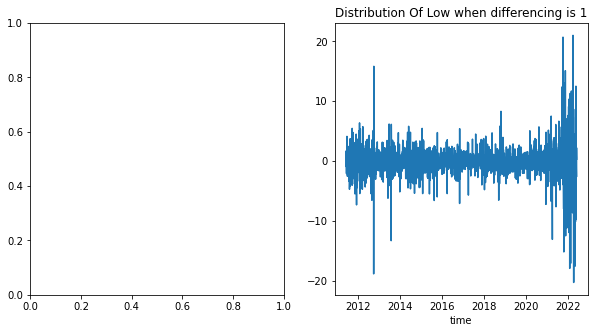

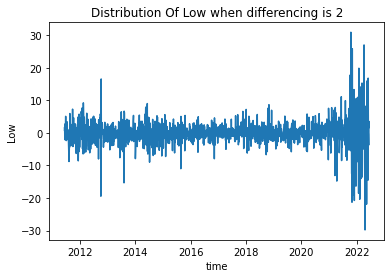

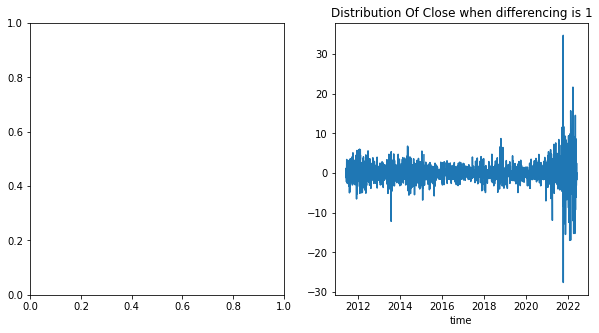

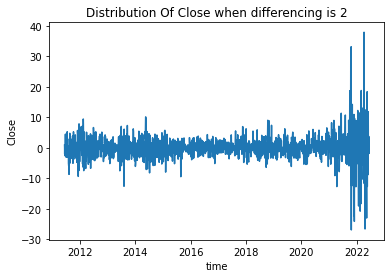

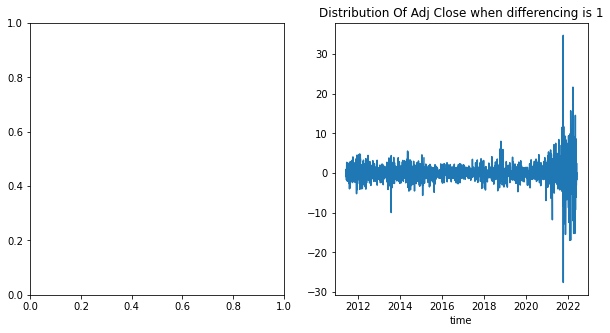

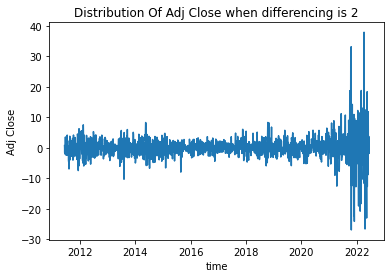

In [186]:
diff_plotter(data)

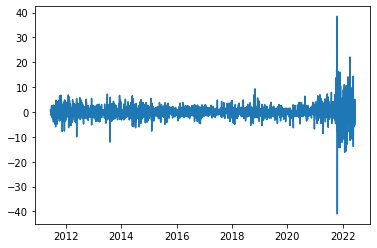

In [187]:
plt.plot(data['Open'].diff(1))

ACF and PACF plots for original Series

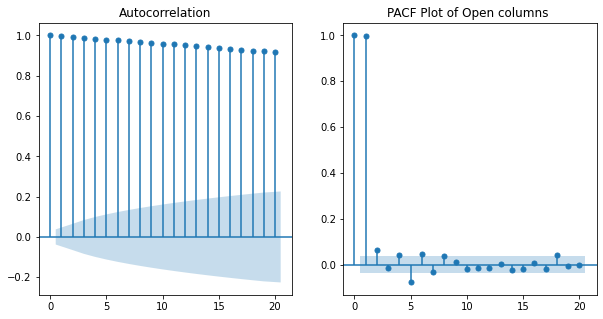

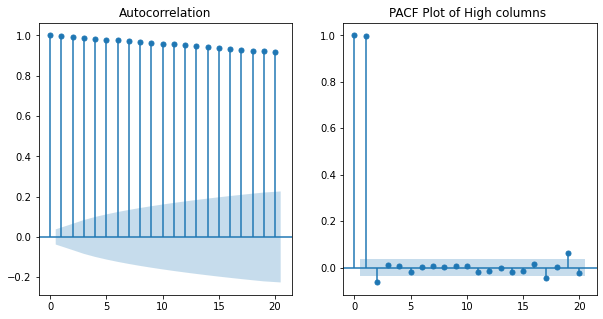

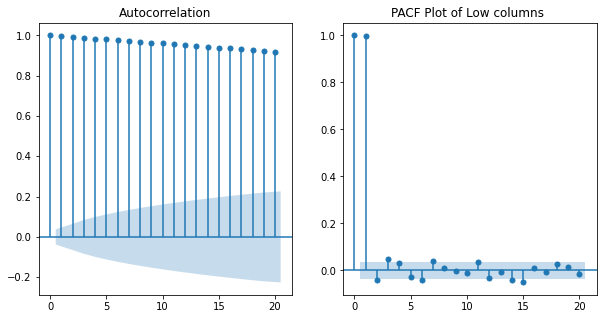

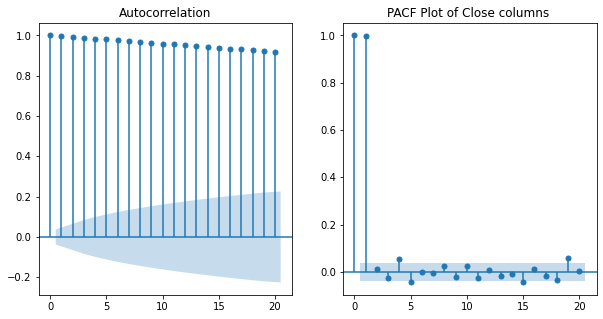

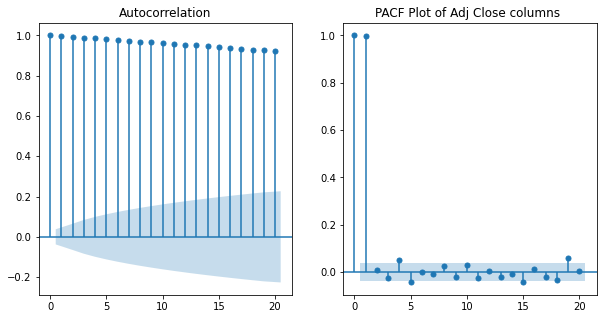

In [188]:
#plot acf and pacf plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for i in data.columns:
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    plot_acf(data[i].dropna(),ax=ax[0],lags=20)
    plot_pacf(data[i].dropna(),ax=ax[1],lags=20)
    ax[0]=plt.title(f'ACF Plot of {i} columns ')
    ax[1]=plt.title(f'PACF Plot of {i} columns ')


    

In [189]:
#test for 2022
test_len=100
train=data['Close'].values[:-100]
test=data['Close'].values[-100:]

In [190]:
train_data=data['Close'][:-100]
test_data=data['Close'][-100:]

Cleaning by interpolation 

In [191]:
data.isnull().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
dtype: int64

In [193]:
data.isnull().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
dtype: int64

In [194]:
data=data.interpolate()

In [195]:
data.isnull().sum()  #now there is no null values are there

Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

ACF and PACF plots for differencing series

In [196]:
def diff_acf_pacf(df):
    for i in df.columns:
        diff1=df[i].diff(1)
        diff2=df[i].diff(2)
        fig,ax=plt.subplots(1,6,figsize=(5,2))
        ax[0]=plt.plot(diff1)
        ax[0]=plt.title(f'Diff 1 plot for {i} variable')
        ax[1]=plot_acf(diff1.dropna(),lags=20)
        ax[1]=plt.title(f'ACF diff1 plot for {i} variable')
        ax[2]=plot_pacf(diff1.dropna(),lags=20)
        ax[2]=plt.title(f'PACF diff1 plot for {i} variable')
        ax[3]=plt.plot(diff2)
        ax[3]=plt.title(f'Diff 2 plot for {i} variable')
        ax[4]=plot_acf(diff2.dropna(),lags=20)
        ax[4]=plt.title(f'ACF diff2 plot for {i} variable')
        ax[5]=plot_pacf(diff2.dropna(),lags=20)
        ax[5]=plt.title(f'PACF diff2 plot for {i} variable')


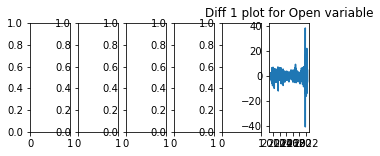

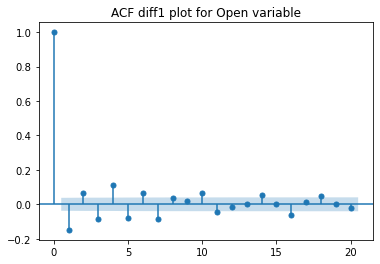

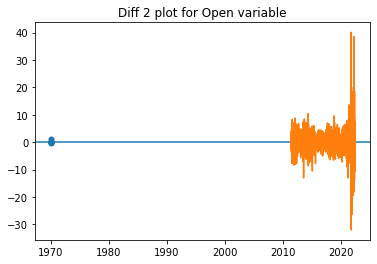

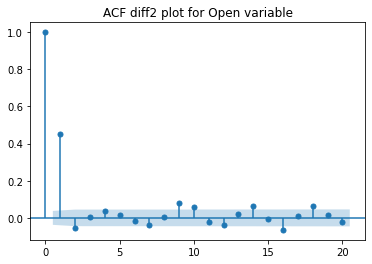

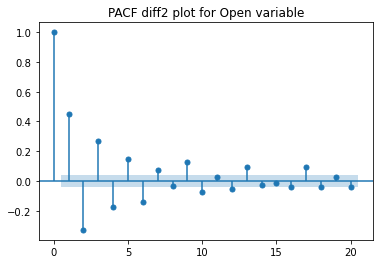

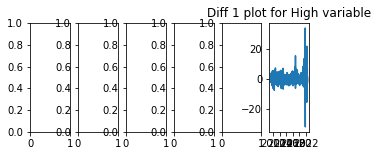

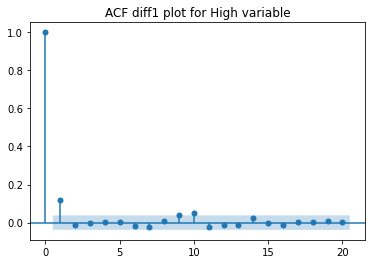

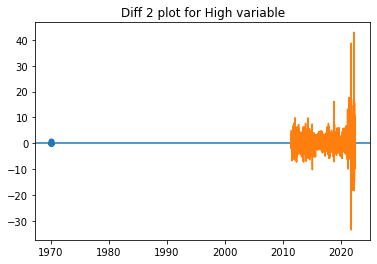

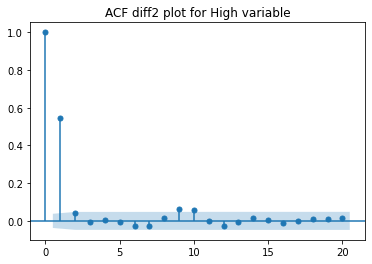

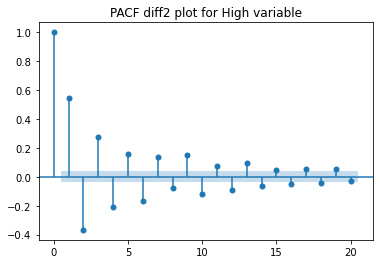

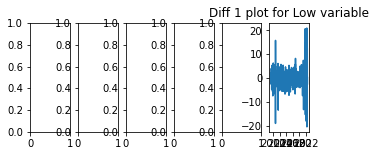

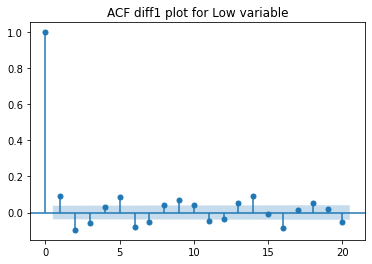

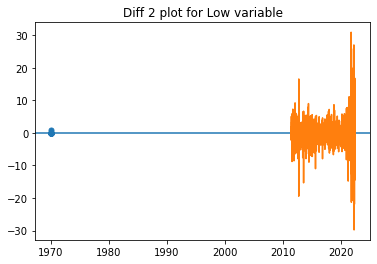

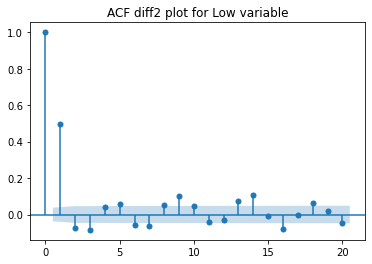

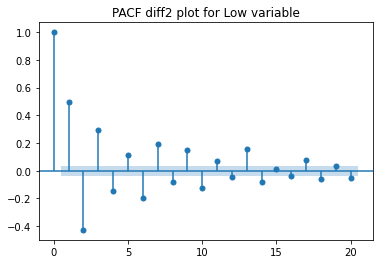

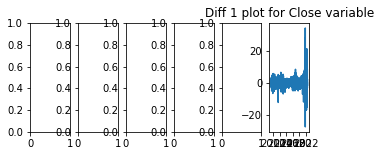

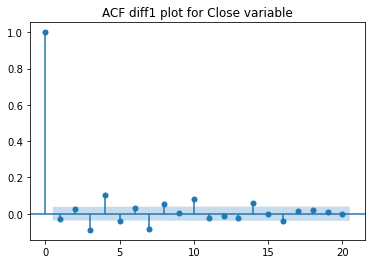

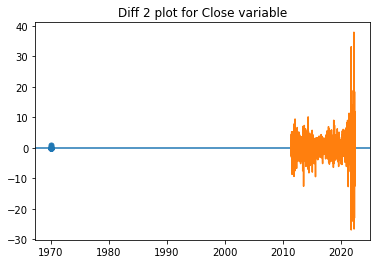

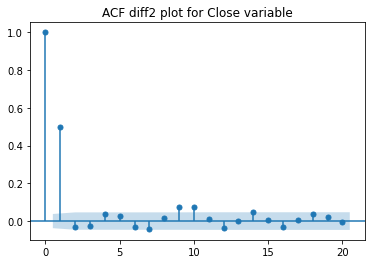

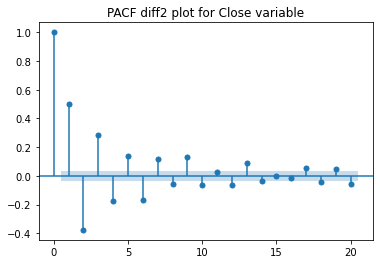

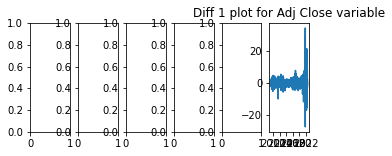

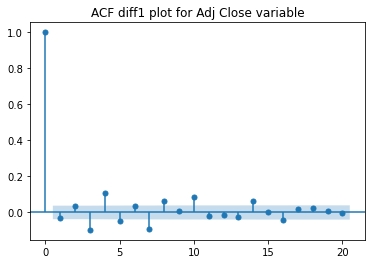

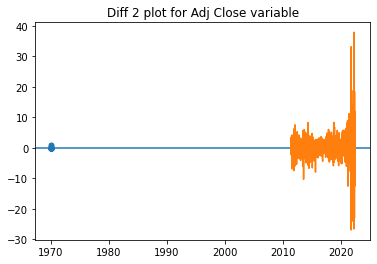

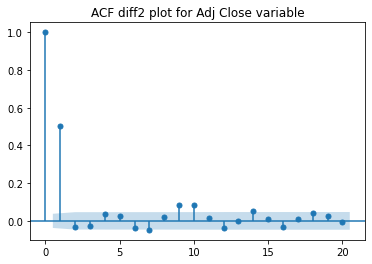

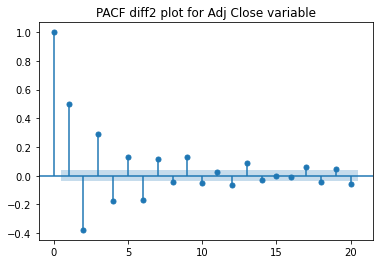

In [197]:
diff_acf_pacf(data)

By the above graph we can draw the concluson that for d=1 series will becomes stationary and for d=1 acf and pacf plots are consistant.
So order=(2,1,2)

# ARIMA

In [198]:
#test for 2022
test_len=100
train=data['Close'].values[:-100]
test=data['Close'].values[-100:]

In [199]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
from sklearn.metrics import mean_squared_error

    
def arima_fit(df):
    d=1
    pq=itertools.product(range(1,4),repeat=2)
    list_pq=list(pq)
    aic_pq={}
    aics=[]
    for p,q in list_pq:
        try:
            model=ARIMA(train,oreder=(p,d,q))
            result=model.fit(disp=-1)
            aic_pq.update({result.aic:(p,d,q)})
            aics.append(result.aic)
        except:
            continue
    print(aics)    
    print(aic_pq)
    #best_aic=min(aics)
    #order=aic_pq[best_aic][0]
    #print(order,'has min aic value')

In [200]:
model=ARIMA(train,order=(2,1,2))
result=model.fit(disp=0)
result

In [201]:
result.aic

11455.162767000602

In [202]:
pred=model.predict(test)
pred

array([   245.300003  , -38635.35978305, -59530.27301807, ...,
                   nan,             nan,             nan])

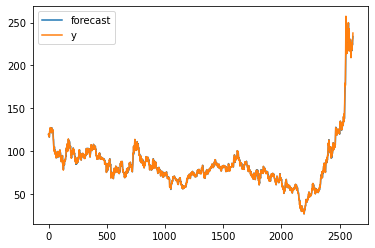

In [203]:
result.plot_predict(dynamic=False)
plt.show()

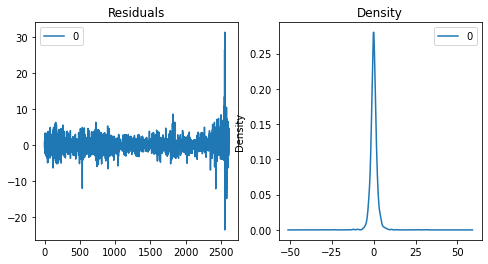

In [204]:
residual=pd.DataFrame(result.resid)
fig,ax=plt.subplots(1,2,figsize=(8,4))
residual.plot(title="Residuals",ax=ax[0])
residual.plot(kind='kde',title="Density",ax=ax[1])
plt.show()



In [205]:
fc,se,conf=result.forecast(200,alpha=0.05)

In [206]:
fc

array([237.34750268, 237.96980085, 237.47400512, 237.98398251,
       237.64129149, 238.00611364, 237.78867322, 238.04888106,
       237.91775447, 238.10708567, 238.03405077, 238.17580416,
       238.1417247 , 238.2515861 , 238.24361473, 238.33210336,
       238.34162818, 238.41579411, 238.43704374, 238.50161154,
       238.53071837, 238.58885414, 238.62322633, 238.67705178,
       238.71495247, 238.76588944, 238.80615469, 238.85515598,
       238.89700581, 238.94470995, 238.98762164, 239.03445651,
       239.07807981, 239.12433216, 239.16843232, 239.21429429,
       239.25871402, 239.30431439, 239.34894827, 239.39437333,
       239.43915072, 239.48445831, 239.52933186, 239.57456072,
       239.61949872, 239.66467483, 239.70965602, 239.75479677,
       239.7998069 , 239.84492396, 239.88995348, 239.93505466,
       239.98009719, 240.02518773, 240.07023896, 240.11532237,
       240.16037944, 240.20545807, 240.25051906, 240.29559449,
       240.34065809, 240.38573137, 240.43079673, 240.47

In [207]:
fc_series=pd.Series(fc)
lower=pd.Series(conf[:,0])
upper=pd.Series(conf[:,1])

In [208]:
pred_data=pd.Series(pred)

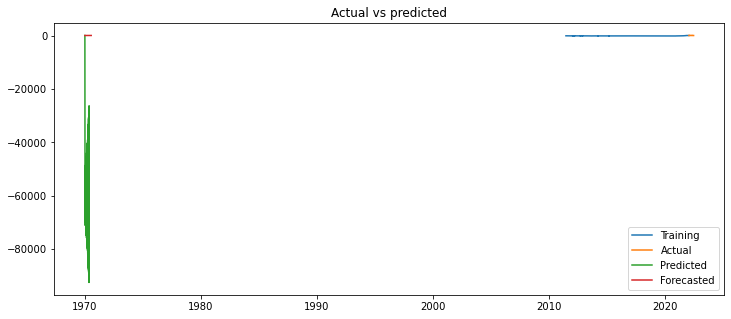

In [209]:
plt.figure(figsize=(12,5))
plt.plot(train_data,label='Training')
plt.plot(test_data,label='Actual')
plt.plot(pred_data,label='Predicted')
plt.plot(fc_series,label='Forecasted')
plt.title('Actual vs predicted')
plt.legend()
plt.show()

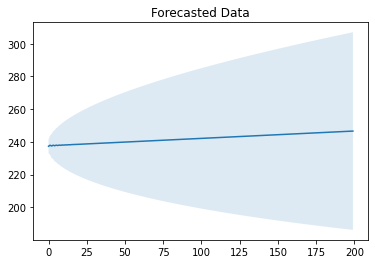

In [210]:
plt.plot(fc,label='forecasted')
plt.fill_between(lower.index,lower,upper,alpha=.15)
plt.title('Forecasted Data')
plt.show()

# LSTM 

In [216]:
from sklearn.preprocessing import StandardScaler
St=StandardScaler()
data_st=St.fit_transform(data['Close'].values.reshape(-1,1))

In [220]:
#I will take 10 days values to forecast the next value
time_interval_to_train=10
x_train=[]
y_train=[]
for i in range(time_interval_to_train,len(data_st)):
    x_train.append(data_st[i-time_interval_to_train:i,0])
    y_train.append(data_st[i,0])    

In [224]:
#reshape the data for lstm
x_train=np.array(x_train)
y_train=np.array(y_train)

In [253]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model=Sequential()
model.add(LSTM(128,return_sequences=True,activation='relu',input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=True,activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(32,return_sequences=True,activation='relu'))
model.add(Dropout(0.1))
model.add(LSTM(16,return_sequences=True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(8,return_sequences=True,activation='relu'))
model.add(LSTM(4,return_sequences=True,activation='relu'))
model.add(LSTM(2,activation='relu'))
model.add(Dense(1))

In [254]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='mean_squared_error')


In [255]:
import datetime
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)               #early stopping criteria
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)               
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

#tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=False, epochs=100, callbacks=[es, rlr, mcp], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 0.1822 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 4.28006, saving model to weights.h5
9/9 [==============================] - 19s 383ms/step - loss: 0.1822 - accuracy: 0.0000e+00 - val_loss: 4.2801 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.1791 - accuracy: 0.0000e+00
Epoch 2: val_loss did not improve from 4.28006
9/9 [==============================] - 1s 140ms/step - loss: 0.1791 - accuracy: 0.0000e+00 - val_loss: 4.2906 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 0.0000e+00
Epoch 3: val_loss did not improve from 4.28006
9/9 [==============================] - 1s 163ms/step - loss: 0.1765 - accuracy: 0.0000e+00 - val_loss: 4.3015 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.1739 - accuracy: 0.0

In [256]:
pred_lstm=model.predict(x_train)
pred_lstm=St.inverse_transform(pred)
pred

array([[116.85241],
       [116.74617],
       [116.79819],
       ...,
       [613.64844],
       [624.6604 ],
       [650.38666]], dtype=float32)

In [257]:
y_train_new=St.inverse_transform(y_train)

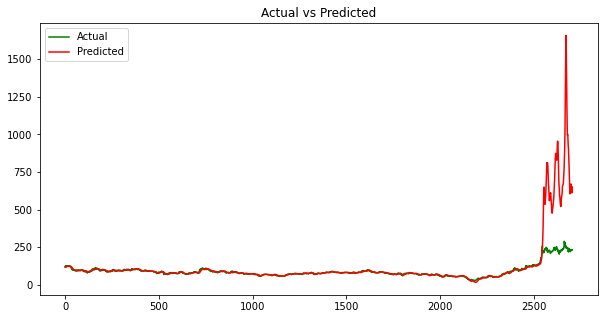

In [261]:
plt.figure(figsize=(10,5))
plt.plot(y_train_new,c='g',label='Actual')
plt.plot(pred,c='r',label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

As we can see that LSTM is not perfoming well. There is a husge gap in Actual vs Predicted values.

In [262]:
mse=mean_squared_error(y_train,pred)
print('Mean Squared error is :', mse)

Mean Squared error is : 40732.06547218139


# RNN model

In [274]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
model_rnn=Sequential()
model_rnn.add(SimpleRNN(64,return_sequences=True,activation='relu',input_shape=(x_train.shape[1],1)))
model_rnn.add(Dropout(0.3))
model_rnn.add(SimpleRNN(28,activation='relu'))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [275]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,TensorBoard
es=EarlyStopping(monitor='val_loss',patience=10,min_delta=1e-10,verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)               
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
model_rnn.fit(x_train,y_train,callbacks=[es,rlr,mcp],epochs=100,batch_size=28,validation_split=0.2)

Epoch 1/100
72/78 [==========================>...] - ETA: 0s - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.06180, saving model to weights.h5
78/78 [==============================] - 5s 18ms/step - loss: 0.0149 - accuracy: 0.0000e+00 - val_loss: 0.0618 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
74/78 [===========================>..] - ETA: 0s - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 0.06180 to 0.02088, saving model to weights.h5
78/78 [==============================] - 1s 11ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0209 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
73/78 [===========================>..] - ETA: 0s - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 3: val_loss did not improve from 0.02088
78/78 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0621 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
76/78 [============================>.

In [283]:
pred_rnn=model_rnn.predict(x_train)
pred_rnn=St.inverse_transform(pred_rnn)

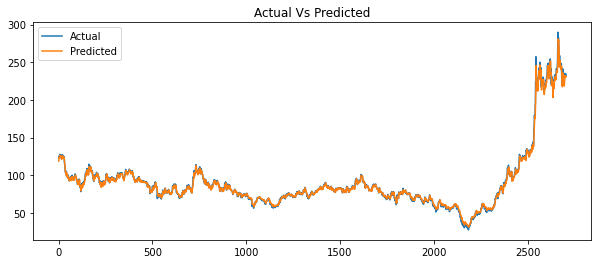

In [286]:
#plot for actual and predicted
plt.figure(figsize=(10,4))
plt.plot(y_train_new,label='Actual')     #already we have y_train_new which is transformed
plt.plot(pred_rnn,label='Predicted')
plt.title('Actual Vs Predicted')
plt.legend()

In [287]:
mse=mean_squared_error(y_train_new,pred_rnn)
print('Mean Squared Error is ',mse)

Mean Squared Error is  7.944233568352829


I have used three models for predicting share prices

1-ARIMA model              
2-LSTM                             
3-RNN

In these three max accuracy and min mean squared error i got in RNN model. So we can use this model in future as well for predicting the share prices.

# Summary

In this i downloaded the data of tata power share over 10 years of data. this data was of day wise frequency. Then I want to predict closing price of Share at the end of the day. Then I did data cleaning and replaced null values by interpolation method. After that I visualised the ACF and PACF plots of actual series. Then found ACF plots was almost constant. So I applied ACF anf PAcf plots for series with differencing 1 and 2. So I applied ARIMA models with order (2,1,2) which was quite good and forecasted the close price for after 200 days and I good Strieght line for rising the price of shares. Then i applied 2nd method LSTM in that i tried to find close price by 10 days of data. So this methis has not that much of accuracy. After the visusalisation we cam see that our model was predicted good but when trend came after that price was not that much of predictable. So in last i applied RNN model in that i got maximum accuracy nad minimum mean squared error. So by visulaisation we can see that our RNN is predicting very closely to actual price.\